#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

### Import Necessary Libraries

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load the Given Dataset

In [6]:
# Load the dataset
df1 = pd.read_csv('heart.csv')
# print the first few rows in the dataset using head
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###  Preprocessing the dataset

In [7]:
# Check the shape of the dataset
df1.shape

# Here, 303 rows and 14 columns

(303, 14)

In [8]:
# check the information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# check the Unique columns
df1.columns.unique()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# check the duplicate columns
df1.duplicated().sum()

1

In [11]:
# Drop the duplicate data
df = df1.drop_duplicates()

In [12]:
# check the shape of the dataset after remove the duplicate daya
df.shape

(302, 14)

### 1. Statistical analysis of the data

In [13]:
# check the statistical data using describe function
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# Check the null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Check for outliers

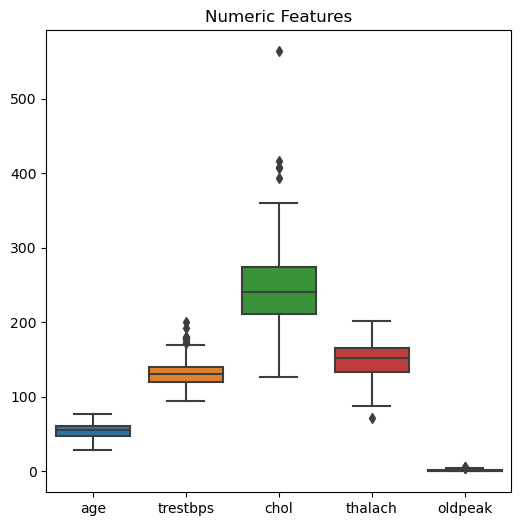

In [15]:
# Select numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Visualize the outliers using box plot
plt.figure(figsize=(6,6))
sns.boxplot(df[numeric_features])
plt.title('Numeric Features')
plt.show()

In [16]:
# Calculate IQR for each numeric features
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3-Q1

#Identify outliers
outliers = ((df[numeric_features]<(Q1-1.5*IQR)) | (df[numeric_features]>(Q3+1.5*IQR)))

# Count the number of outliers for each feature
outliers.sum()

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [17]:
# Remove the outliers
df2 = df[~outliers.any(axis=1)]

<Axes: >

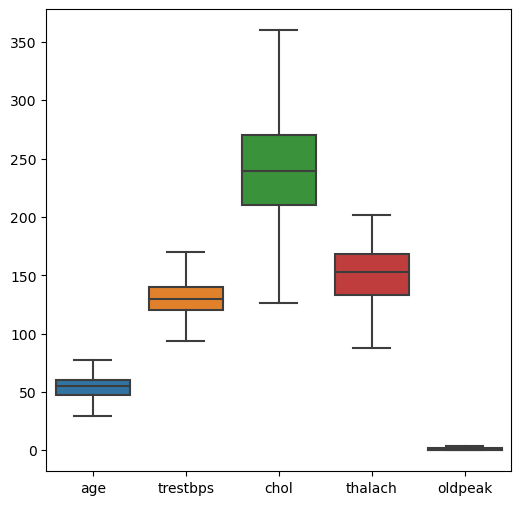

In [18]:
# visualize the box plot 
plt.figure(figsize=(6,6))
sns.boxplot(df2[numeric_features])

### 2. Univariate and bivariate analysis

#### Univariate Analysis

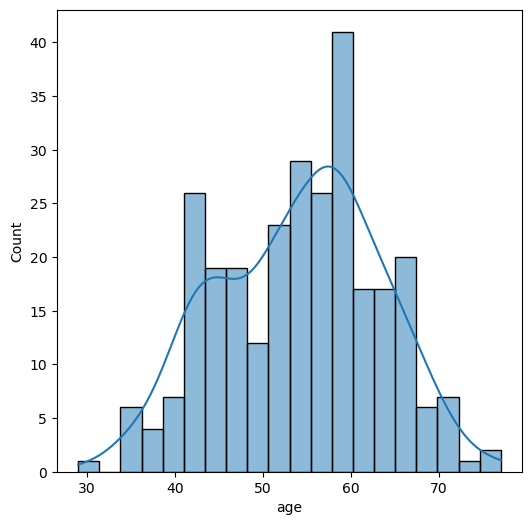

In [19]:
# Visualize the univariate analysis using histogram
plt.figure(figsize=(6,6))
sns.histplot(data=df2, bins=20, x='age',kde=True)
plt.show()

#### Bivariate Analysis

<Figure size 400x400 with 0 Axes>

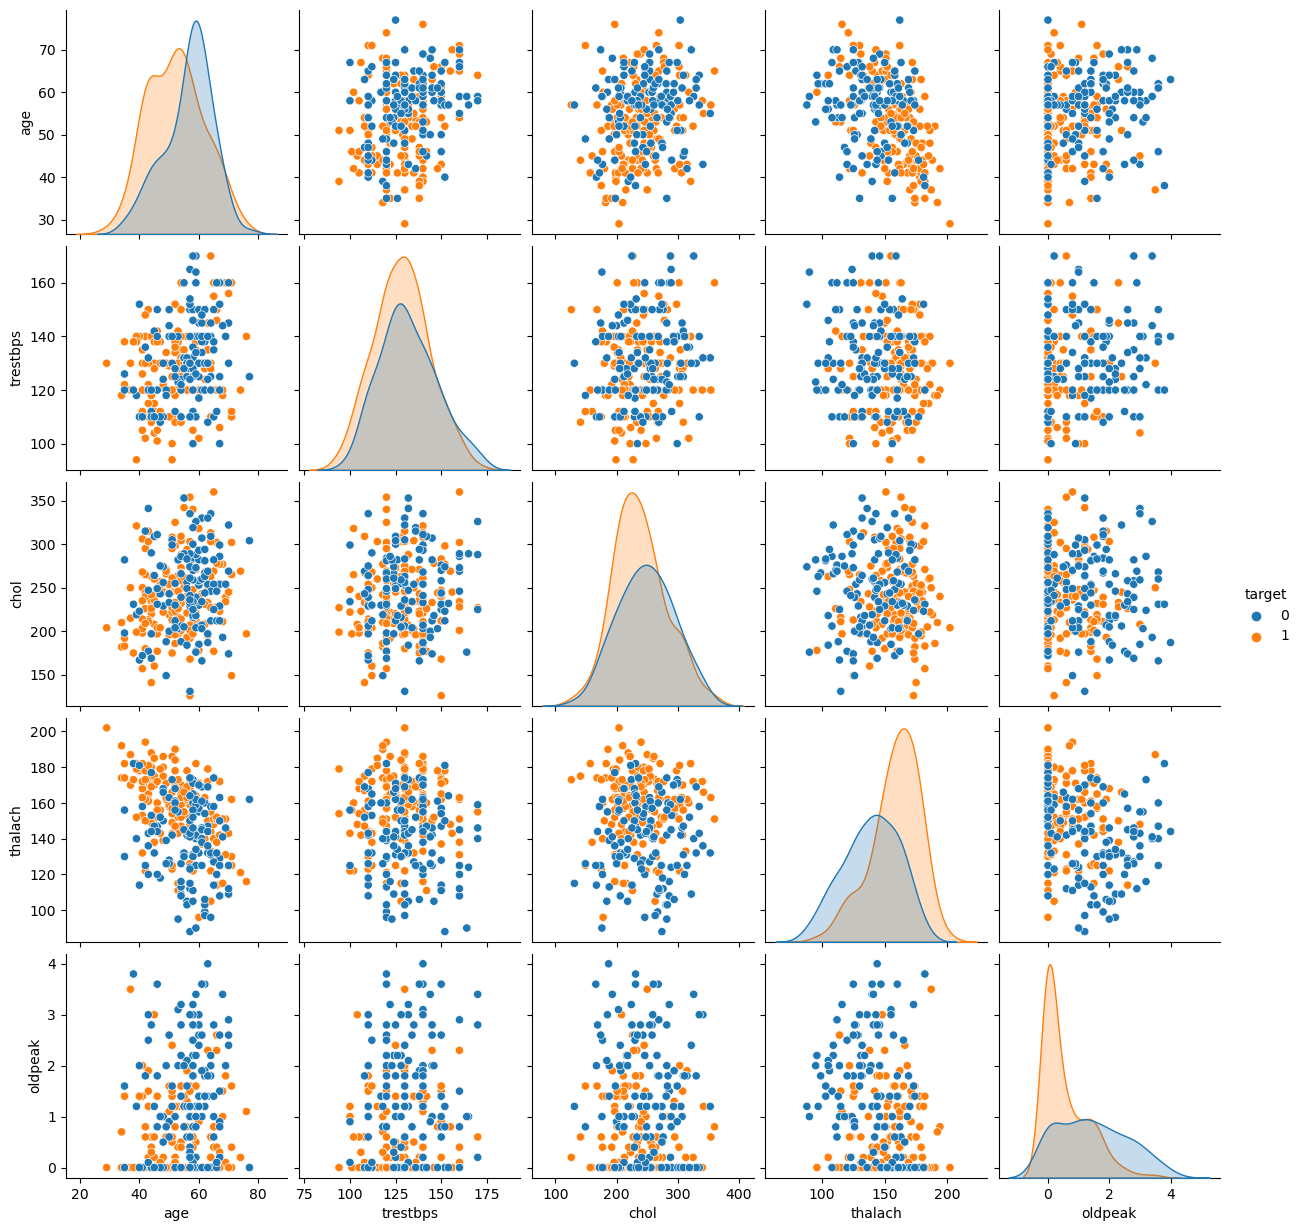

In [20]:
# Bivariate analysis using pair plot
plt.figure(figsize=(4,4))
sns.pairplot(df2, vars = numeric_features, hue='target')
plt.show()

### 3. Find the correlation

In [52]:
# Correlation analysis
corr = df2.corr()
# print the correlation matrix
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.064118,-0.058687,0.282669,0.171015,0.106885,-0.110517,-0.411108,0.093718,0.209254,-0.149095,0.320589,0.055908,-0.222416
sex,-0.064118,1.000000,-0.091357,0.007572,-0.123863,0.066692,-0.083290,-0.042981,0.182596,0.157352,-0.060014,0.150209,0.243271,-0.318896
cp,-0.058687,-0.091357,1.000000,0.083242,-0.080369,0.084389,0.080836,0.285605,-0.388610,-0.122582,0.095881,-0.171717,-0.179204,0.416319
trestbps,0.282669,0.007572,0.083242,1.000000,0.115138,0.127221,-0.139228,-0.071600,0.001726,0.144438,-0.083024,0.105458,-0.011026,-0.115614
chol,0.171015,-0.123863,-0.080369,0.115138,1.000000,0.013066,-0.142285,-0.020128,0.076547,-0.009534,0.039352,0.081070,0.091667,-0.105627
fbs,0.106885,0.066692,0.084389,0.127221,0.013066,1.000000,-0.077417,-0.023484,0.006080,0.015070,-0.069563,0.156265,-0.064469,-0.027210
restecg,-0.110517,-0.083290,0.080836,-0.139228,-0.142285,-0.077417,1.000000,0.089556,-0.104440,-0.089255,0.111841,-0.091123,0.034684,0.171453
thalach,-0.411108,-0.042981,0.285605,-0.071600,-0.020128,-0.023484,0.089556,1.000000,-0.387726,-0.341190,0.376494,-0.253937,-0.112838,0.422559
exang,0.093718,0.182596,-0.388610,0.001726,0.076547,0.006080,-0.104440,-0.387726,1.000000,0.318620,-0.259780,0.133820,0.202806,-0.431599
oldpeak,0.209254,0.157352,-0.122582,0.144438,-0.009534,0.015070,-0.089255,-0.341190,0.318620,1.000000,-0.525142,0.179032,0.189822,-0.434108


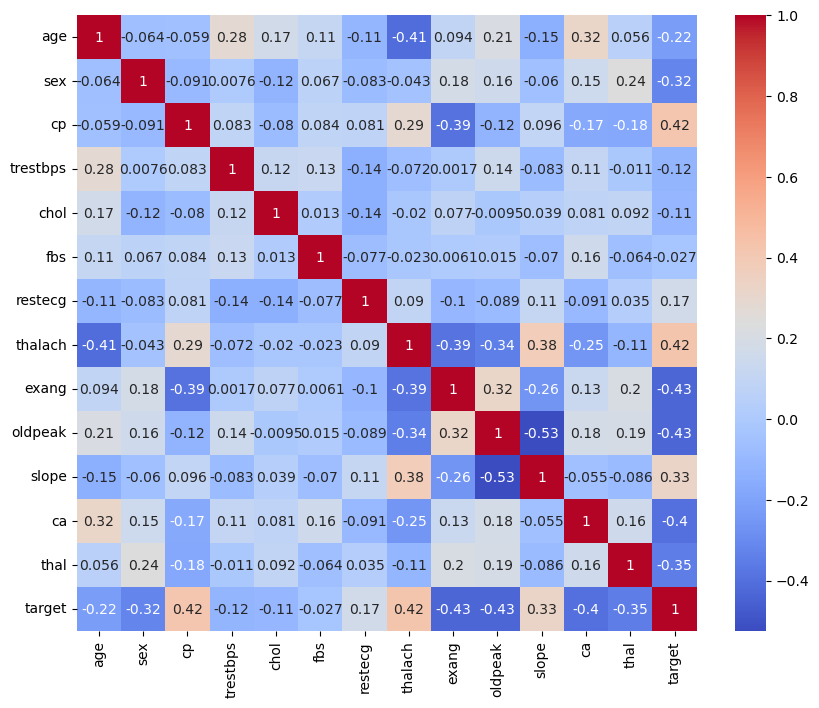

In [53]:
# visualize the heatmap to identify the good correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### 4. Perform PCA and find the variance from 2 components

In [21]:
# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2.drop('target', axis=1))
# print the scandard data
scaled_data

array([[ 0.98227462,  0.65520449,  1.95641929, ..., -2.38648344,
        -0.70762663, -2.1283321 ],
       [-1.87109161,  0.65520449,  0.98507428, ..., -2.38648344,
        -0.70762663, -0.48713868],
       [-1.43211219, -1.52624106,  0.01372926, ...,  0.95695623,
        -0.70762663, -0.48713868],
       ...,
       [ 1.53099889,  0.65520449, -0.95761576, ..., -0.71476361,
         1.32545292,  1.15405474],
       [ 0.32380549,  0.65520449, -0.95761576, ..., -0.71476361,
         0.30891315,  1.15405474],
       [ 0.32380549, -1.52624106,  0.01372926, ..., -0.71476361,
         0.30891315, -0.48713868]])

In [22]:
# perform PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_components = pca.transform(scaled_data)
# print the data
pca_components

array([[ 0.79719151,  2.75524237],
       [-0.32840946, -1.04281618],
       [-1.78276372, -0.10659196],
       [-1.61520434, -0.51152105],
       [-0.41343285, -0.02431872],
       [-0.56634056,  0.02868163],
       [-0.08162156,  1.38885745],
       [-1.83230611, -1.34032069],
       [-1.30810147,  0.31365659],
       [-0.72366855, -0.2896575 ],
       [-1.82058392,  0.6291647 ],
       [-1.64260461, -0.34278835],
       [ 0.73410203, -0.28457313],
       [-1.14123344,  3.3394845 ],
       [-1.1809812 , -0.08601979],
       [-2.15021821,  1.17393429],
       [ 1.21928661,  1.83111949],
       [-1.07765086, -0.4821961 ],
       [-0.36344192,  2.26085586],
       [ 0.04123749, -0.73652289],
       [-1.56673662, -1.06176486],
       [-1.97162644, -0.87225538],
       [ 1.05605599,  1.25471   ],
       [-1.17388572, -1.37429005],
       [-0.20911762,  2.8205865 ],
       [-0.61880685,  1.59852556],
       [-1.29996378, -1.07170614],
       [ 0.39071514,  0.90018906],
       [-2.52555431,

In [23]:
# Variance explained by each componet
variance_ratio = pca.explained_variance_ratio_
print('Variance explained by first component:',variance_ratio[0])
print('Variance explained by second component:',variance_ratio[1])

Variance explained by first component: 0.21151650384605256
Variance explained by second component: 0.11839245141224515


###  Conclusion

PCA has successfully reducing the dimensionality of the dataset. The first principle component explains 21.15% of the variance. It is most significant patterns in the dataset. The second component explains 11.83% of the variable. Together, they explains approximatly 32.99% of the total variance. It gives insights into the dataset keypatterns and relationships.

#### Thank You !!!